Import Libraries

In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

import PIL
from PIL import Image

In [2]:
#Directory folder
folder = 'C:/Users/vinhm/Google Drive/School Documents/Springboard/Capstone Project 3/Data/'

Load Data

In [3]:
test = pd.read_csv(folder+'written_name_test_v2.csv')
train = pd.read_csv(folder+'written_name_train_v2.csv')
val = pd.read_csv(folder+'written_name_validation_v2.csv')

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41300 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB


In [5]:
test.describe()

,FILENAME,IDENTITY
count,41370,41300
unique,41370,20279
top,TEST_0001.jpg,THOMAS
freq,1,227


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330961 entries, 0 to 330960
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  330961 non-null  object
 1   IDENTITY  330396 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB


In [7]:
train.describe()

,FILENAME,IDENTITY
count,330961,330396
unique,330961,100539
top,TRAIN_00001.jpg,THOMAS
freq,1,1825


In [8]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41292 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB


In [9]:
val.describe()

,FILENAME,IDENTITY
count,41370,41292
unique,41370,20227
top,VALIDATION_0001.jpg,THOMAS
freq,1,219


Viewing Data

In [10]:
test.head()

,FILENAME,IDENTITY
0,TEST_0001.jpg,KEVIN
1,TEST_0002.jpg,CLOTAIRE
2,TEST_0003.jpg,LENA
3,TEST_0004.jpg,JULES
4,TEST_0005.jpg,CHERPIN


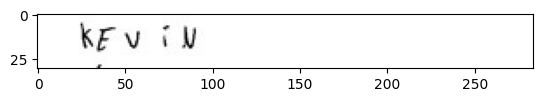

In [11]:
# Test opening an image
image2 = Image.open(folder+'test_v2/test/TEST_0001.jpg')
imgplot2 = plt.imshow(image2)

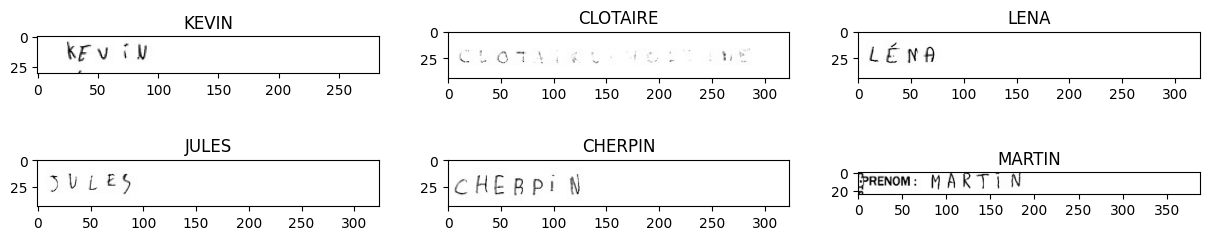

In [12]:
# Examples of 'test' images
plt.figure(figsize=(15, 10))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = Image.open(folder+'test_v2/test/'+test.loc[i, 'FILENAME'])
    plt.imshow(img_dir, cmap = 'gray')
    plt.title(test.loc[i, 'IDENTITY'], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [13]:
train.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


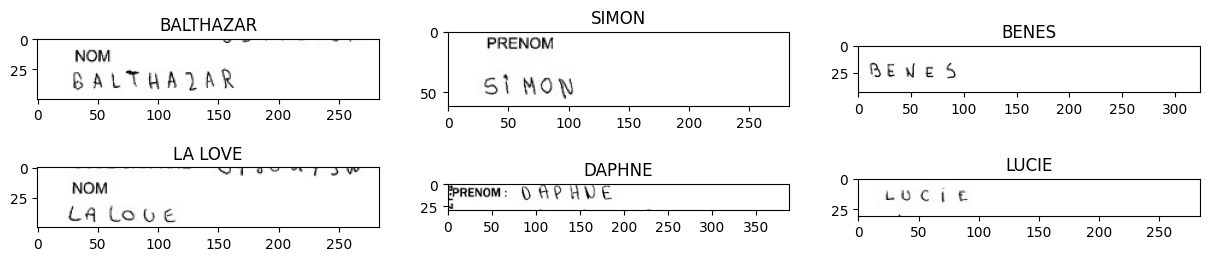

In [14]:
# Examples of 'train' images
plt.figure(figsize=(15, 10))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = Image.open(folder+'train_v2/train/'+train.loc[i, 'FILENAME'])
    plt.imshow(img_dir, cmap = 'gray')
    plt.title(train.loc[i, 'IDENTITY'], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [15]:
val.head()

,FILENAME,IDENTITY
0,VALIDATION_0001.jpg,BILEL
1,VALIDATION_0002.jpg,LAUMIONIER
2,VALIDATION_0003.jpg,LEA
3,VALIDATION_0004.jpg,JEAN-ROCH
4,VALIDATION_0005.jpg,RUPP


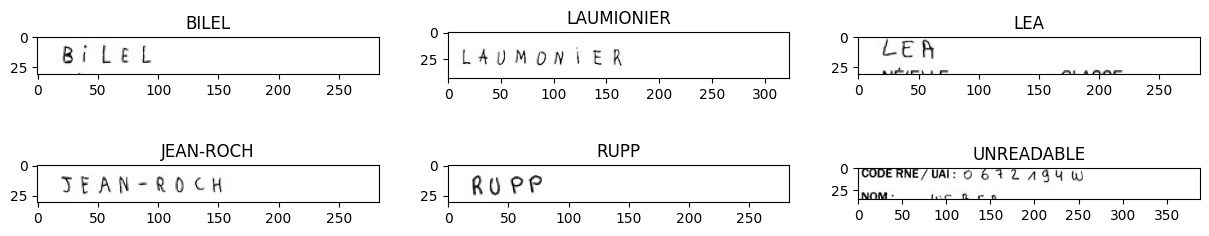

In [16]:
# Examples of 'val' images
plt.figure(figsize=(15, 10))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = Image.open(folder+'validation_v2/validation/'+val.loc[i, 'FILENAME'])
    plt.imshow(img_dir, cmap = 'gray')
    plt.title(val.loc[i, 'IDENTITY'], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

Cleaning Data

In [17]:
# Number of NaN values in data
print("NaNs in test: ", test['IDENTITY'].isnull().sum())
print("NaNs in train: ", train['IDENTITY'].isnull().sum())
print("NaNs in val: ", val['IDENTITY'].isnull().sum())

NaNs in test:  70
NaNs in train:  565
NaNs in val:  78


In [18]:
# Dropping files with NaN values
test.dropna(axis=0, inplace=True)
train.dropna(axis=0, inplace=True)
val.dropna(axis=0, inplace=True)

There are images which are 'Unreadable' as well. Those must also be dropped.

In [19]:
test = test[test['IDENTITY'] != 'UNREADABLE']
train = train[train['IDENTITY'] != 'UNREADABLE']
val = val[val['IDENTITY'] != 'UNREADABLE']

In [20]:
test.reset_index(inplace = True, drop=True) 
train.reset_index(inplace = True, drop=True) 
val.reset_index(inplace = True, drop=True) 

In [21]:
pd.value_counts(test.values.flatten())

THOMAS            227
EMPTY             221
EMMA              202
LEA               200
HUGO              187
                 ... 
HANDOUS             1
TEST_13918.jpg      1
TEST_13919.jpg      1
LE FOURN            1
MELAB               1
Length: 61567, dtype: int64

In [22]:
pd.value_counts(train.values.flatten())

THOMAS              1825
EMPTY               1796
LEA                 1582
EMMA                1482
LUCAS               1479
                    ... 
TRAIN_111586.jpg       1
TRAIN_111585.jpg       1
TRAIN_111584.jpg       1
APERODETU              1
TRAIN_330961.jpg       1
Length: 430832, dtype: int64

In [23]:
pd.value_counts(val.values.flatten())

THOMAS                  219
LEA                     204
LUCAS                   195
EMPTY                   187
EMMA                    186
                       ... 
VALIDATION_13930.jpg      1
MORHAIN                   1
VALIDATION_13931.jpg      1
SCHUPP                    1
VALIDATION_41370.jpg      1
Length: 61506, dtype: int64

There are images that are unlabeled (i.e. 'EMPTY') as well. Those should be dropped too.

In [24]:
test_empty = test.loc[test['IDENTITY'] == 'EMPTY']
test_empty

,FILENAME,IDENTITY
187,TEST_0188.jpg,EMPTY
274,TEST_0275.jpg,EMPTY
685,TEST_0686.jpg,EMPTY
762,TEST_0763.jpg,EMPTY
913,TEST_0914.jpg,EMPTY
...,...,...
40577,TEST_40655.jpg,EMPTY
40584,TEST_40662.jpg,EMPTY
40734,TEST_40813.jpg,EMPTY
40999,TEST_41079.jpg,EMPTY


In [25]:
test_empty.reset_index(inplace = True, drop=True) 

There are 221 rows where the 'IDENTITY' is 'EMPTY'.

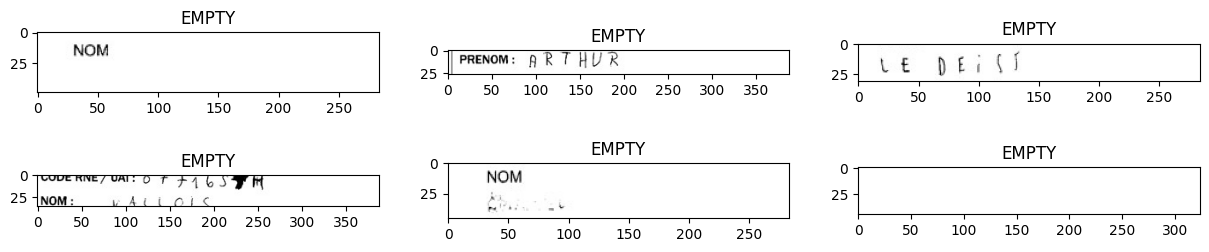

In [26]:
plt.figure(figsize=(15, 10))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = Image.open(folder+'test_v2/test/'+test_empty.loc[i, 'FILENAME'])
    plt.imshow(img_dir, cmap = 'gray')
    plt.title(test_empty.loc[i, 'IDENTITY'], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

Removing all 'EMPTY' rows.

In [27]:
test = test[test['IDENTITY'] != 'EMPTY']
train = train[train['IDENTITY'] != 'EMPTY']
val = val[val['IDENTITY'] != 'EMPTY']

In [28]:
pd.value_counts(test.values.flatten())

THOMAS            227
EMMA              202
LEA               200
HUGO              187
CAMILLE           178
                 ... 
TEST_13923.jpg      1
TEST_13924.jpg      1
TEST_13925.jpg      1
SAADA               1
MELAB               1
Length: 61345, dtype: int64

In [29]:
pd.value_counts(train.values.flatten())

THOMAS              1825
LEA                 1582
EMMA                1482
LUCAS               1479
CAMILLE             1367
                    ... 
TRAIN_111595.jpg       1
TRAIN_111594.jpg       1
TRAIN_111593.jpg       1
TRAIN_111592.jpg       1
TRAIN_330961.jpg       1
Length: 429035, dtype: int64

In [30]:
pd.value_counts(val.values.flatten())

THOMAS                  219
LEA                     204
LUCAS                   195
EMMA                    186
CAMILLE                 177
                       ... 
VALIDATION_13934.jpg      1
HEM-MALIKA                1
VALIDATION_13935.jpg      1
DAL                       1
VALIDATION_41370.jpg      1
Length: 61318, dtype: int64

For consistency, all labels will be set to uppercase.

In [31]:
test['IDENTITY'] = test['IDENTITY'].str.upper()
train['IDENTITY'] = train['IDENTITY'].str.upper()
val['IDENTITY'] = val['IDENTITY'].str.upper()

In [32]:
test.reset_index(inplace = True, drop=True) 
train.reset_index(inplace = True, drop=True) 
val.reset_index(inplace = True, drop=True)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328498 entries, 0 to 328497
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  328498 non-null  object
 1   IDENTITY  328498 non-null  object
dtypes: object(2)
memory usage: 5.0+ MB


Function to tokenize each name.

In [34]:
alphabet = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "
maxlen = 24
chars = len(alphabet)+1
maxpred = 64

def A_to_N(label):
    alphanum = []
    for a in label:
        alphanum.append(alphabet.find(a))
    return np.array(alphanum)

def N_to_A(num):
    numalpha = []
    for n in num:
        if n == -1:
            break
        else:
            numalpha += alphabet[n]
    return numalpha

Function to normalize each image.

In [35]:
def img_normalize(img):
    (h, w) = img.shape
    final_img = np.ones([64, 256])*255 # blank white image
    # crop
    if w > 256:
        img = img[:, :256]
    if h > 64:
        img = img[:64, :]
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

In [36]:
x_train = []
for i in range(30000):
    img_dir = folder+'train_v2/train/'+train.loc[i, 'FILENAME']
    img = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    img = img_normalize(img)
    img = img/255.
    x_train.append(img)

In [37]:
x_val = []
for i in range(3000):
    img_dir = folder+'validation_v2/validation/'+val.loc[i, 'FILENAME']
    img = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    img = img_normalize(img)
    img = img/255.
    x_val.append(img)